<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(1_6)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_1.6'

In [4]:
os.listdir(base_path)

['data_add_delta_1.6_n20.csv',
 'data_add_delta_1.6_n30.csv',
 'data_add_delta_1.6_n60.csv',
 'data_add_delta_1.6_n120.csv',
 'data_add_delta_1.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.6_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,54.580620,74.172760,26.683045,165.436424,135.381865,30.054560
1,0.0,1.0,47.355747,67.679948,12.398954,137.434648,123.571240,13.863409
2,0.0,2.0,45.085528,29.093149,-0.347255,83.831422,89.248534,-5.417112
3,0.0,3.0,24.545639,90.808514,-24.521553,100.832600,122.825619,-21.993019
4,0.0,4.0,20.605711,70.456988,-29.075316,71.987383,102.304169,-30.316786
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,60.301818,82.548743,-16.957486,135.893074,151.969843,-16.076769
249996,999.0,246.0,99.119776,59.630992,12.762569,181.513338,167.801201,13.712137
249997,999.0,247.0,47.471418,90.649689,-26.539540,121.581566,147.227375,-25.645809
249998,999.0,248.0,24.127690,67.404819,-4.994375,96.538135,103.198193,-6.660058


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,54.580620,74.172760,26.683045,165.436424,135.381865,30.054560
1,0.0,1.0,47.355747,67.679948,12.398954,137.434648,123.571240,13.863409
2,0.0,2.0,45.085528,29.093149,-0.347255,83.831422,89.248534,-5.417112
3,0.0,3.0,24.545639,90.808514,-24.521553,100.832600,122.825619,-21.993019
4,0.0,4.0,20.605711,70.456988,-29.075316,71.987383,102.304169,-30.316786
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,60.301818,82.548743,-16.957486,135.893074,151.969843,-16.076769
249996,999.0,246.0,99.119776,59.630992,12.762569,181.513338,167.801201,13.712137
249997,999.0,247.0,47.471418,90.649689,-26.539540,121.581566,147.227375,-25.645809
249998,999.0,248.0,24.127690,67.404819,-4.994375,96.538135,103.198193,-6.660058


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    54.580620  74.172760  26.683045  165.436424  135.381865   
      1.0    47.355747  67.679948  12.398954  137.434648  123.571240   
      2.0    45.085528  29.093149  -0.347255   83.831422   89.248534   
      3.0    24.545639  90.808514 -24.521553  100.832600  122.825619   
      4.0    20.605711  70.456988 -29.075316   71.987383  102.304169   
...                ...        ...        ...         ...         ...   
999.0 245.0  60.301818  82.548743 -16.957486  135.893074  151.969843   
      246.0  99.119776  59.630992  12.762569  181.513338  167.801201   
      247.0  47.471418  90.649689 -26.539540  121.581566  147.227375   
      248.0  24.127690  67.404819  -4.994375   96.538135  103.198193   
      249.0  75.361830  72.618437 -45.516990  112.463277  157.143496   

                 e_hat  
rep   index             
0.0   0.0    30.054560  
      1.0    13.863409  
      2.0    -5.417112  
      3.0   -21.993019  
      4.0   -30.316786  
...                ...  
999.0 245.0 -16.076769  
      246.0  13.712137  
      247.0 -25.645809  
      248.0  -6.660058  
      249.0 -44.680219  

[250000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    54.580620  74.172760  26.683045  165.436424  135.381865   
      1.0    47.355747  67.679948  12.398954  137.434648  123.571240   
      2.0    45.085528  29.093149  -0.347255   83.831422   89.248534   
      3.0    24.545639  90.808514 -24.521553  100.832600  122.825619   
      4.0    20.605711  70.456988 -29.075316   71.987383  102.304169   
...                ...        ...        ...         ...         ...   
999.0 245.0  60.301818  82.548743 -16.957486  135.893074  151.969843   
      246.0  99.119776  59.630992  12.762569  181.513338  167.801201   
      247.0  47.471418  90.649689 -26.539540  121.581566  147.227375   
      248.0  24.127690  67.404819  -4.994375   96.538135  103.198193   
      249.0  75.361830  72.618437 -45.516990  112.463277  157.143496   

                 e_hat  
rep   index             
0.0   0.0    30.054560  
      1.0    13.863409  
      2.0    -5.417112  
      3.0   -21.993019  
      4.0   -30.316786  
...                ...  
999.0 245.0 -16.076769  
      246.0  13.712137  
      247.0 -25.645809  
      248.0  -6.660058  
      249.0 -44.680219  

[250000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,54.580620,74.172760,26.683045,165.436424,135.381865,30.054560
1,0.0,1.0,47.355747,67.679948,12.398954,137.434648,123.571240,13.863409
2,0.0,2.0,45.085528,29.093149,-0.347255,83.831422,89.248534,-5.417112
3,0.0,3.0,24.545639,90.808514,-24.521553,100.832600,122.825619,-21.993019
4,0.0,4.0,20.605711,70.456988,-29.075316,71.987383,102.304169,-30.316786
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,60.301818,82.548743,-16.957486,135.893074,151.969843,-16.076769
249996,999.0,246.0,99.119776,59.630992,12.762569,181.513338,167.801201,13.712137
249997,999.0,247.0,47.471418,90.649689,-26.539540,121.581566,147.227375,-25.645809
249998,999.0,248.0,24.127690,67.404819,-4.994375,96.538135,103.198193,-6.660058


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    54.580620  74.172760  26.683045  165.436424  135.381865   
      1.0    47.355747  67.679948  12.398954  137.434648  123.571240   
      2.0    45.085528  29.093149  -0.347255   83.831422   89.248534   
      3.0    24.545639  90.808514 -24.521553  100.832600  122.825619   
      4.0    20.605711  70.456988 -29.075316   71.987383  102.304169   
...                ...        ...        ...         ...         ...   
999.0 245.0  60.301818  82.548743 -16.957486  135.893074  151.969843   
      246.0  99.119776  59.630992  12.762569  181.513338  167.801201   
      247.0  47.471418  90.649689 -26.539540  121.581566  147.227375   
      248.0  24.127690  67.404819  -4.994375   96.538135  103.198193   
      249.0  75.361830  72.618437 -45.516990  112.463277  157.143496   

                 e_hat  
rep   index             
0.0   0.0    30.054560  
      1.0    13.863409  
      2.0    -5.417112  
      3.0   -21.993019  
      4.0   -30.316786  
...                ...  
999.0 245.0 -16.076769  
      246.0  13.712137  
      247.0 -25.645809  
      248.0  -6.660058  
      249.0 -44.680219  

[250000 rows x 6 columns]

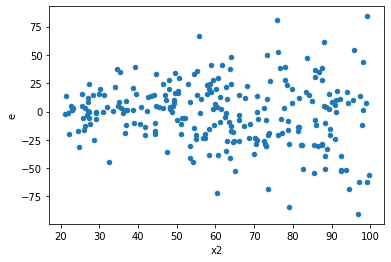

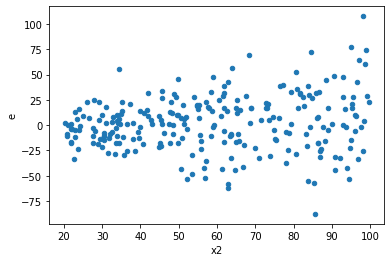

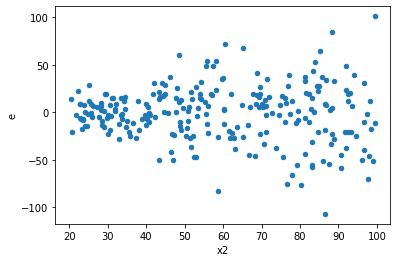

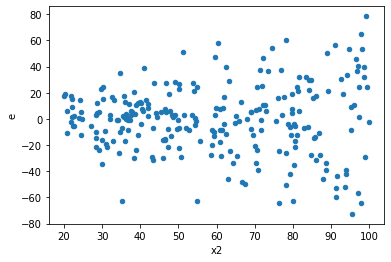

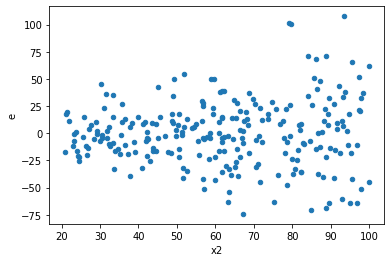

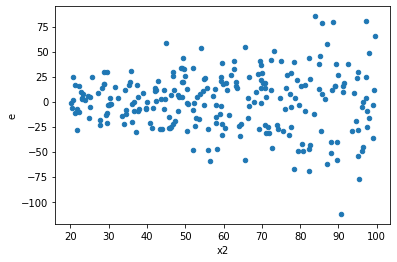

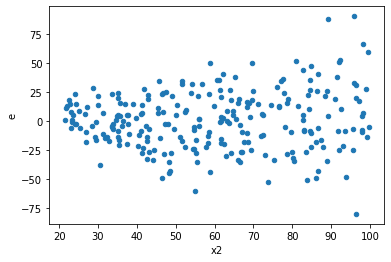

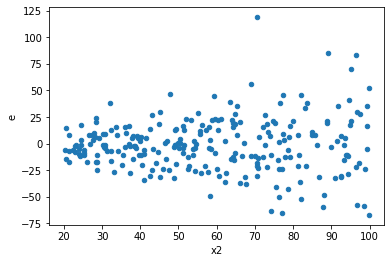

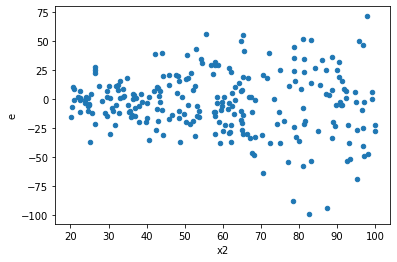

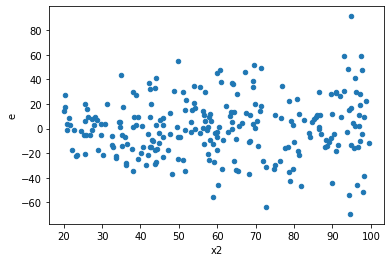

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,98.0,98.0,56095.98015754085,98872.6222904522,572.4079607912331,1008.9043090862469,1.762561631203818,0.005438164179681015,0.9972809179101595,0.0027190820898405077,Reject001=0 : Heteroscedasticity
1.0,98.0,98.0,38926.517560935004,99297.44864421051,397.2093628666837,1013.2392718796991,2.5508947336162744,5.5453322405085714e-06,0.9999972273338797,2.7726661202542857e-06,Reject001=0 : Heteroscedasticity
2.0,98.0,98.0,53542.588708671385,112158.46626293147,546.3529460068509,1144.474145540117,2.094752401180914,0.00030567276908444185,0.9998471636154578,0.00015283638454222093,Reject001=0 : Heteroscedasticity
3.0,98.0,98.0,34558.453898294545,97407.1571505408,352.63728467647496,993.9505831687837,2.8186202263911997,5.489660233060079e-07,0.9999997255169883,2.7448301165300393e-07,Reject001=0 : Heteroscedasticity
4.0,98.0,98.0,44196.97623094287,125819.8143821269,450.98955337696805,1283.8756569604786,2.846796887748145,4.3162625362747065e-07,0.9999997841868732,2.1581312681373532e-07,Reject001=0 : Heteroscedasticity
5.0,98.0,98.0,55679.88910565946,108098.69500377674,568.162133731219,1103.0479082018035,1.941431578619816,0.0011696242622547537,0.9994151878688726,0.0005848121311273768,Reject001=0 : Heteroscedasticity
6.0,98.0,98.0,40226.81138134204,79962.63025088563,410.47766715655143,815.9452066416901,1.9877943964500706,0.0007807625083511294,0.9996096187458244,0.0003903812541755647,Reject001=0 : Heteroscedasticity
7.0,98.0,98.0,30693.01741290459,96170.88667297782,313.19405523372035,981.3355782956921,3.133314831162337,3.882427312973391e-08,0.9999999805878634,1.9412136564866955e-08,Reject001=0 : Heteroscedasticity
8.0,98.0,98.0,38309.01327519942,84835.1144062294,390.90829872652466,865.6644327166266,2.2144948969789877,0.00010647319762036034,0.9999467634011898,5.323659881018017e-05,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,98.0,98.0,56095.98015754085,98872.6222904522,572.4079607912331,1008.9043090862469,1.762561631203818,0.005438164179681015,Reject001=0 : Heteroscedasticity
1.0,98.0,98.0,38926.517560935004,99297.44864421051,397.2093628666837,1013.2392718796991,2.5508947336162744,5.5453322405085714e-06,Reject001=0 : Heteroscedasticity
2.0,98.0,98.0,53542.588708671385,112158.46626293147,546.3529460068509,1144.474145540117,2.094752401180914,0.00030567276908444185,Reject001=0 : Heteroscedasticity
3.0,98.0,98.0,34558.453898294545,97407.1571505408,352.63728467647496,993.9505831687837,2.8186202263911997,5.489660233060079e-07,Reject001=0 : Heteroscedasticity
4.0,98.0,98.0,44196.97623094287,125819.8143821269,450.98955337696805,1283.8756569604786,2.846796887748145,4.3162625362747065e-07,Reject001=0 : Heteroscedasticity
5.0,98.0,98.0,55679.88910565946,108098.69500377674,568.162133731219,1103.0479082018035,1.941431578619816,0.0011696242622547537,Reject001=0 : Heteroscedasticity
6.0,98.0,98.0,40226.81138134204,79962.63025088563,410.47766715655143,815.9452066416901,1.9877943964500706,0.0007807625083511294,Reject001=0 : Heteroscedasticity
7.0,98.0,98.0,30693.01741290459,96170.88667297782,313.19405523372035,981.3355782956921,3.133314831162337,3.882427312973391e-08,Reject001=0 : Heteroscedasticity
8.0,98.0,98.0,38309.01327519942,84835.1144062294,390.90829872652466,865.6644327166266,2.2144948969789877,0.00010647319762036034,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    889
Reject001=1 : Homoscedasticity      111
Name: Result_test, dtype: int64